In [2]:
from argopy import DataFetcher as ArgoDataFetcher

ds = ArgoDataFetcher().region([-75, -45, 20, 30, 0, 100, '2020-01', '2020-03']).to_xarray()

In [3]:
ds

<xarray.Dataset> Size: 2MB
Dimensions:          (N_POINTS: 15592)
Coordinates:
    LATITUDE         (N_POINTS) float64 125kB 27.88 27.88 27.88 ... 26.0 26.0
    LONGITUDE        (N_POINTS) float64 125kB -74.32 -74.32 ... -70.14 -70.14
    TIME             (N_POINTS) datetime64[ns] 125kB 2020-01-01T00:45:35 ... ...
  * N_POINTS         (N_POINTS) int64 125kB 0 1 2 3 ... 15588 15589 15590 15591
Data variables: (12/15)
    CYCLE_NUMBER     (N_POINTS) int64 125kB 213 213 213 213 ... 137 137 137 137
    DATA_MODE        (N_POINTS) <U1 62kB 'D' 'D' 'D' 'D' 'D' ... 'D' 'D' 'D' 'D'
    DIRECTION        (N_POINTS) <U1 62kB 'A' 'A' 'A' 'A' 'A' ... 'A' 'A' 'A' 'A'
    PLATFORM_NUMBER  (N_POINTS) int64 125kB 4901626 4901626 ... 4902341 4902341
    POSITION_QC      (N_POINTS) int64 125kB 1 1 1 1 1 1 1 1 ... 1 1 1 1 1 1 1 1
    PRES             (N_POINTS) float32 62kB 1.16 2.0 3.0 ... 96.0 98.08 100.0
    ...               ...
    PSAL_ERROR       (N_POINTS) float32 62kB 0.01 0.01 0.01 ... 0.01067 0.01019
    PSAL_QC          (N_POINTS) int64 125kB 1 1 1 1 1 1 1 1 ... 1 1 1 1 1 1 1 1
    TEMP             (N_POINTS) float32 62kB 25.21 25.22 25.22 ... 23.13 23.04
    TEMP_ERROR       (N_POINTS) float32 62kB 0.002 0.002 0.002 ... 0.002 0.002
    TEMP_QC          (N_POINTS) int64 125kB 1 1 1 1 1 1 1 1 ... 1 1 1 1 1 1 1 1
    TIME_QC          (N_POINTS) int64 125kB 1 1 1 1 1 1 1 1 ... 1 1 1 1 1 1 1 1
Attributes:
    DATA_ID:              ARGO
    DOI:                  http://doi.org/10.17882/42182
    Fetched_from:         erddap.ifremer.fr
    Fetched_by:           Rinku
    Fetched_date:         2025/09/05
    Fetched_constraints:  [x=-75.00/-45.00; y=20.00/30.00; z=0.0/100.0; t=202...
    Fetched_uri:          https://erddap.ifremer.fr/erddap/tabledap/ArgoFloat...
    Processing_history:   [PRES,TEMP,PSAL] real-time and adjusted/delayed var...

In [4]:
ds['TEMP']

<xarray.DataArray 'TEMP' (N_POINTS: 15592)> Size: 62kB
array([25.214, 25.219, 25.218, ..., 23.288, 23.131, 23.039],
      shape=(15592,), dtype=float32)
Coordinates:
    LATITUDE   (N_POINTS) float64 125kB 27.88 27.88 27.88 ... 26.0 26.0 26.0
    LONGITUDE  (N_POINTS) float64 125kB -74.32 -74.32 -74.32 ... -70.14 -70.14
    TIME       (N_POINTS) datetime64[ns] 125kB 2020-01-01T00:45:35 ... 2020-0...
  * N_POINTS   (N_POINTS) int64 125kB 0 1 2 3 4 ... 15588 15589 15590 15591
Attributes:
    long_name:      SEA TEMPERATURE IN SITU ITS-90 SCALE
    standard_name:  sea_water_temperature
    units:          degree_Celsius
    valid_min:      -2.0
    valid_max:      40.0
    resolution:     0.001
    casted:         1

In [5]:
ds1 = ds.argo.point2profile()
ds1

<xarray.Dataset> Size: 446kB
Dimensions:          (N_PROF: 261, N_LEVELS: 100)
Coordinates:
  * N_PROF           (N_PROF) int64 2kB 53 169 69 11 118 ... 12 75 25 212 105
  * N_LEVELS         (N_LEVELS) int64 800B 0 1 2 3 4 5 6 ... 94 95 96 97 98 99
    LATITUDE         (N_PROF) float64 2kB 27.88 25.02 29.08 ... 24.96 25.66 26.0
    LONGITUDE        (N_PROF) float64 2kB -74.32 -70.92 -56.72 ... -60.44 -70.14
    TIME             (N_PROF) datetime64[ns] 2kB 2020-01-01T00:45:35 ... 2020...
Data variables: (12/15)
    CYCLE_NUMBER     (N_PROF) int64 2kB 213 138 207 80 34 ... 81 213 138 39 137
    DATA_MODE        (N_PROF) <U1 1kB 'D' 'A' 'D' 'D' 'D' ... 'D' 'D' 'D' 'D'
    DIRECTION        (N_PROF) <U1 1kB 'A' 'A' 'A' 'D' 'A' ... 'A' 'A' 'A' 'A'
    PLATFORM_NUMBER  (N_PROF) int64 2kB 4901626 6901215 ... 6902915 4902341
    POSITION_QC      (N_PROF) int64 2kB 1 1 1 1 1 1 1 1 1 ... 1 1 1 1 1 1 1 1 1
    PRES             (N_PROF, N_LEVELS) float32 104kB 1.16 2.0 3.0 ... nan nan
    ...               ...
    PSAL_ERROR       (N_PROF, N_LEVELS) float32 104kB 0.01 0.01 0.01 ... nan nan
    PSAL_QC          (N_PROF) int64 2kB 1 1 1 1 1 1 1 1 1 ... 1 1 1 1 1 1 1 1 1
    TEMP             (N_PROF, N_LEVELS) float32 104kB 25.21 25.22 ... nan nan
    TEMP_ERROR       (N_PROF) float32 1kB 0.002 nan 0.002 ... 0.002 0.002 0.002
    TEMP_QC          (N_PROF) int64 2kB 1 1 1 1 1 1 1 1 1 ... 1 1 1 1 1 1 1 1 1
    TIME_QC          (N_PROF) int64 2kB 1 1 1 1 1 1 1 1 1 ... 1 1 1 1 1 1 1 1 1
Attributes:
    DATA_ID:              ARGO
    DOI:                  http://doi.org/10.17882/42182
    Fetched_from:         erddap.ifremer.fr
    Fetched_by:           Rinku
    Fetched_date:         2025/09/05
    Fetched_constraints:  [x=-75.00/-45.00; y=20.00/30.00; z=0.0/100.0; t=202...
    Fetched_uri:          https://erddap.ifremer.fr/erddap/tabledap/ArgoFloat...
    Processing_history:   [PRES,TEMP,PSAL] real-time and adjusted/delayed var...

In [6]:
type(ds1)
import pandas as pd

In [7]:
df=ds.to_dataframe()
df

,CYCLE_NUMBER,DATA_MODE,DIRECTION,PLATFORM_NUMBER,POSITION_QC,PRES,PRES_ERROR,PRES_QC,PSAL,PSAL_ERROR,PSAL_QC,TEMP,TEMP_ERROR,TEMP_QC,TIME_QC,LATITUDE,LONGITUDE,TIME
N_POINTS,,,,,,,,,,,,,,,,,,
0,213,D,A,4901626,1,1.160000,2.4,1,36.693710,0.01000,1,25.214001,0.002,1,1,27.88021,-74.32412,2020-01-01 00:45:35
1,213,D,A,4901626,1,2.000000,2.4,1,36.694092,0.01000,1,25.219000,0.002,1,1,27.88021,-74.32412,2020-01-01 00:45:35
2,213,D,A,4901626,1,3.000000,2.4,1,36.694149,0.01000,1,25.218000,0.002,1,1,27.88021,-74.32412,2020-01-01 00:45:35
3,213,D,A,4901626,1,3.960000,2.4,1,36.694790,0.01000,1,25.215000,0.002,1,1,27.88021,-74.32412,2020-01-01 00:45:35
4,213,D,A,4901626,1,5.040000,2.4,1,36.694832,0.01000,1,25.218000,0.002,1,1,27.88021,-74.32412,2020-01-01 00:45:35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15587,137,D,A,4902341,1,92.040001,2.4,1,37.108601,0.01256,1,23.577000,0.002,1,1,26.00500,-70.14220,2020-02-29 14:53:22
15588,137,D,A,4902341,1,94.000000,2.4,1,37.063541,0.01098,1,23.382999,0.002,1,1,26.00500,-70.14220,2020-02-29 14:53:22
15589,137,D,A,4902341,1,96.000000,2.4,1,37.061649,0.01149,1,23.288000,0.002,1,1,26.00500,-70.14220,2020-02-29 14:53:22


In [8]:
type(df)

pandas.core.frame.DataFrame

In [9]:
from langchain_community.document_loaders import DataFrameLoader
# ...existing code...
import pandas as pd
df["text"] = df.apply(lambda row: str(row.to_dict()), axis=1)
df_subset = df.iloc[:100]  # or customize as needed
df_subset=df_subset[["text"]]
loader = DataFrameLoader(df_subset)
docs=loader.load()

# ...existing code...

In [10]:
df_subset

,text
N_POINTS,
0,"{np.str_('CYCLE_NUMBER'): 213, np.str_('DATA_M..."
1,"{np.str_('CYCLE_NUMBER'): 213, np.str_('DATA_M..."
2,"{np.str_('CYCLE_NUMBER'): 213, np.str_('DATA_M..."
3,"{np.str_('CYCLE_NUMBER'): 213, np.str_('DATA_M..."
4,"{np.str_('CYCLE_NUMBER'): 213, np.str_('DATA_M..."
...,...
95,"{np.str_('CYCLE_NUMBER'): 138, np.str_('DATA_M..."
96,"{np.str_('CYCLE_NUMBER'): 138, np.str_('DATA_M..."
97,"{np.str_('CYCLE_NUMBER'): 138, np.str_('DATA_M..."


In [11]:
df["text"][0] 

"{np.str_('CYCLE_NUMBER'): 213, np.str_('DATA_MODE'): 'D', np.str_('DIRECTION'): 'A', np.str_('PLATFORM_NUMBER'): 4901626, np.str_('POSITION_QC'): 1, np.str_('PRES'): 1.159999966621399, np.str_('PRES_ERROR'): 2.4000000953674316, np.str_('PRES_QC'): 1, np.str_('PSAL'): 36.69371032714844, np.str_('PSAL_ERROR'): 0.009999999776482582, np.str_('PSAL_QC'): 1, np.str_('TEMP'): 25.214000701904297, np.str_('TEMP_ERROR'): 0.0020000000949949026, np.str_('TEMP_QC'): 1, np.str_('TIME_QC'): 1, 'LATITUDE': 27.88021, 'LONGITUDE': -74.32412, 'TIME': Timestamp('2020-01-01 00:45:35')}"

In [12]:
import getpass
import os

os.environ["LANGSMITH_TRACING"] = "true"

In [39]:
from dotenv import load_dotenv  
load_dotenv()

import getpass
import os

if not os.environ.get("GROQ_API_KEY"):
  os.environ["GROQ_API_KEY"] = getpass.getpass("Enter API key for Groq: ")

from langchain.chat_models import init_chat_model

llm = init_chat_model("gemma2-9b-it", model_provider="groq")

In [14]:
# if not os.environ.get("VOYAGE_API_KEY"):
#    os.environ["VOYAGE_API_KEY"] = getpass.getpass("pa-V97xDtH8uzTlcAIQMCiPHiwiyeylujuw1MCXqAnNLVo")

# from langchain_voyageai import VoyageAIEmbeddings

# embeddings = VoyageAIEmbeddings(model="voyage-3.5")
from langchain_ollama import OllamaEmbeddings

embeddings = OllamaEmbeddings(model="llama3.1")

In [20]:
from langchain_chroma import Chroma

vector_store = Chroma(
    collection_name="example_collection",
    embedding_function=embeddings,
    persist_directory="./chroma_new",
        # Where to save data locally, remove if not necessary
)

In [16]:
print(docs)

[Document(metadata={}, page_content="{np.str_('CYCLE_NUMBER'): 213, np.str_('DATA_MODE'): 'D', np.str_('DIRECTION'): 'A', np.str_('PLATFORM_NUMBER'): 4901626, np.str_('POSITION_QC'): 1, np.str_('PRES'): 1.159999966621399, np.str_('PRES_ERROR'): 2.4000000953674316, np.str_('PRES_QC'): 1, np.str_('PSAL'): 36.69371032714844, np.str_('PSAL_ERROR'): 0.009999999776482582, np.str_('PSAL_QC'): 1, np.str_('TEMP'): 25.214000701904297, np.str_('TEMP_ERROR'): 0.0020000000949949026, np.str_('TEMP_QC'): 1, np.str_('TIME_QC'): 1, 'LATITUDE': 27.88021, 'LONGITUDE': -74.32412, 'TIME': Timestamp('2020-01-01 00:45:35')}"), Document(metadata={}, page_content="{np.str_('CYCLE_NUMBER'): 213, np.str_('DATA_MODE'): 'D', np.str_('DIRECTION'): 'A', np.str_('PLATFORM_NUMBER'): 4901626, np.str_('POSITION_QC'): 1, np.str_('PRES'): 2.0, np.str_('PRES_ERROR'): 2.4000000953674316, np.str_('PRES_QC'): 1, np.str_('PSAL'): 36.694091796875, np.str_('PSAL_ERROR'): 0.009999999776482582, np.str_('PSAL_QC'): 1, np.str_('TEMP

In [21]:
from langchain_text_splitters import RecursiveCharacterTextSplitter
from langchain_core.documents import Document
from langchain_text_splitters import CharacterTextSplitter
text_splitter = RecursiveCharacterTextSplitter(chunk_size=1000, chunk_overlap=200,add_start_index=True)
all_splits = text_splitter.split_documents(docs)
document_ids = vector_store.add_documents(documents=all_splits[0:1])
# docs1 = [
#     Document(page_content="The sun is hot", metadata={"source": "science"}),
#     Document(page_content="Water is wet", metadata={"source": "nature"}),
# ]
import os
os.environ["VOYAGE_API_KEY"] = "pa-V97xDtH8uzTlcAIQMCiPHiwiyeylujuw1MCXqAnNLVo"

In [22]:
document_ids

['bc0c8cd8-7be6-4636-9626-4abf88bdf054']

In [32]:
from langchain_core.documents import Document
from typing_extensions import List, TypedDict
from langchain import hub

# N.B. for non-US LangSmith endpoints, you may need to specify
# api_url="https://api.smith.langchain.com" in hub.pull.
# prompt = hub.pull("rlm/rag-prompt")


prompt = hub.pull(
    "rlm/rag-prompt",
    api_url="https://api.smith.langchain.com"  # non-US users may need this
)

class State(TypedDict):
    question: str
    context: List[Document]
    answer: str

def retrieve(state: State):
    retrieved_docs = vector_store.similarity_search(state["question"])
    return {"context": retrieved_docs}


def generate(state: State):
    docs_content = "\n\n".join(doc.page_content for doc in state["context"])
    messages = prompt.invoke({"question": state["question"], "context": docs_content})
    response = llm.invoke(messages)
    return {"answer": response.content}    

In [31]:
from langgraph.graph import START, StateGraph

graph_builder = StateGraph(State).add_sequence([retrieve, generate])
graph_builder.add_edge(START, "retrieve")
graph = graph_builder.compile()

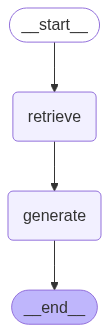

In [33]:
from IPython.display import Image, display

display(Image(graph.get_graph().draw_mermaid_png()))

In [41]:
result = graph.invoke({"question": "What is the temperature near india?"})

print(f"Context: {result['context']}\n\n")
print(f"Answer: {result['answer']}")

Context: [Document(id='bc0c8cd8-7be6-4636-9626-4abf88bdf054', metadata={'start_index': 0}, page_content="{np.str_('CYCLE_NUMBER'): 213, np.str_('DATA_MODE'): 'D', np.str_('DIRECTION'): 'A', np.str_('PLATFORM_NUMBER'): 4901626, np.str_('POSITION_QC'): 1, np.str_('PRES'): 1.159999966621399, np.str_('PRES_ERROR'): 2.4000000953674316, np.str_('PRES_QC'): 1, np.str_('PSAL'): 36.69371032714844, np.str_('PSAL_ERROR'): 0.009999999776482582, np.str_('PSAL_QC'): 1, np.str_('TEMP'): 25.214000701904297, np.str_('TEMP_ERROR'): 0.0020000000949949026, np.str_('TEMP_QC'): 1, np.str_('TIME_QC'): 1, 'LATITUDE': 27.88021, 'LONGITUDE': -74.32412, 'TIME': Timestamp('2020-01-01 00:45:35')}")]


Answer: The temperature near India is not mentioned in the provided context.  The context only contains data related to a specific location with coordinates 27.88021 latitude and -74.32412 longitude.  Therefore, I cannot answer your question. 



In [ ]:
result = graph.invoke({"question": "What is the temperature near india?"})

print(f"Context: {result['context']}\n\n")
print(f"Answer: {result['answer']}")